In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\steph\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
df = pd.read_csv(r'CensusProfile2021-ProfilRecensement2021-20240203111036.csv')

In [27]:
df

,TOPIC,DESCRIPTION,Unnamed: 2,Count,Unnamed: 4
0,Population and dwellings,"Population, 2021",1.0,1306784.0,NaN
1,Population and dwellings,"Population, 2016",1.0,1239220.0,NaN
2,Population and dwellings,"Population percentage change, 2016 to 2021",NaN,5.5,NaN
3,Population and dwellings,Total private dwellings,2.0,531062.0,NaN
4,Population and dwellings,Private dwellings occupied by usual residents,3.0,502301.0,NaN
...,...,...,...,...,...
2626,Eligibility and instruction in the minority of...,Total - Eligibility and instruction in the min...,204.0,205680.0,NaN
2627,Eligibility and instruction in the minority of...,Children eligible for instruction in the min...,NaN,15120.0,NaN
2628,Eligibility and instruction in the minority of...,Eligible children�who have been instructed...,NaN,7850.0,NaN
2629,Eligibility and instruction in the minority of...,Eligible children�who have not been instru...,NaN,7275.0,NaN


In [30]:
unique_values = df['TOPIC'].unique()
print(unique_values)

['Population and dwellings' 'Age characteristics'
 'Household and dwelling characteristics' 'Marital status'
 'Family characteristics' 'Household type' 'Income of individuals in 2020'
 'Income of individuals in 2019' 'Income of households in 2020'
 'Income of economic families in 2020'
 'Low income and income inequality in 2020'
 'Knowledge of official languages' 'First official language spoken'
 'Mother tongue' 'All languages spoken at home'
 'Language spoken most often at home'
 'Other language spoken regularly at home' 'Knowledge of languages'
 'Indigenous population' 'Household characteristics' 'Indigenous ancestry'
 'Citizenship' 'Immigrant status and period of immigration'
 'Age at immigration'
 'Selected places of birth for the immigrant population'
 'Selected places of birth for the recent immigrant population '
 'Generation status' 'Admission category and applicant type'
 'Pre-admission experience' 'Visible minority' 'Ethnic or cultural origin'
 'Religion' 'Mobility status 1 y

In [31]:
def filter_df(df,x,y):
    filtered_df = df[df[x] == y]
    print(filtered_df)
    return filtered_df

In [51]:
df_1 = filter_df(df,'TOPIC', 'Selected places of birth for the immigrant population')
df_1['DESCRIPTION'] = df_1['DESCRIPTION'].str.lstrip().str.rstrip()
df_1 = df_1[~df_1['DESCRIPTION'].isin(['Americas', 'Europe', 'Africa', 'Asia', 'Oceania and other places of birth', 'Total - Place of birth for the immigrant population in private households - 25% sample data','Other places of birth in Americas','Other places of birth in Europe','Other places of birth in Africa','Other places of birth in Asia'])]
df_1 = df_1.drop(['TOPIC','Unnamed: 2','Unnamed: 4'], axis=1).reset_index(drop=True)

                                                  TOPIC  \
1543  Selected places of birth for the immigrant pop...   
1544  Selected places of birth for the immigrant pop...   
1545  Selected places of birth for the immigrant pop...   
1546  Selected places of birth for the immigrant pop...   
1547  Selected places of birth for the immigrant pop...   
1548  Selected places of birth for the immigrant pop...   
1549  Selected places of birth for the immigrant pop...   
1550  Selected places of birth for the immigrant pop...   
1551  Selected places of birth for the immigrant pop...   
1552  Selected places of birth for the immigrant pop...   
1553  Selected places of birth for the immigrant pop...   
1554  Selected places of birth for the immigrant pop...   
1555  Selected places of birth for the immigrant pop...   
1556  Selected places of birth for the immigrant pop...   
1557  Selected places of birth for the immigrant pop...   
1558  Selected places of birth for the immigrant pop... 

C:\Users\steph\AppData\Local\Temp\ipykernel_4704\3665357590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['DESCRIPTION'] = df_1['DESCRIPTION'].str.lstrip().str.rstrip()


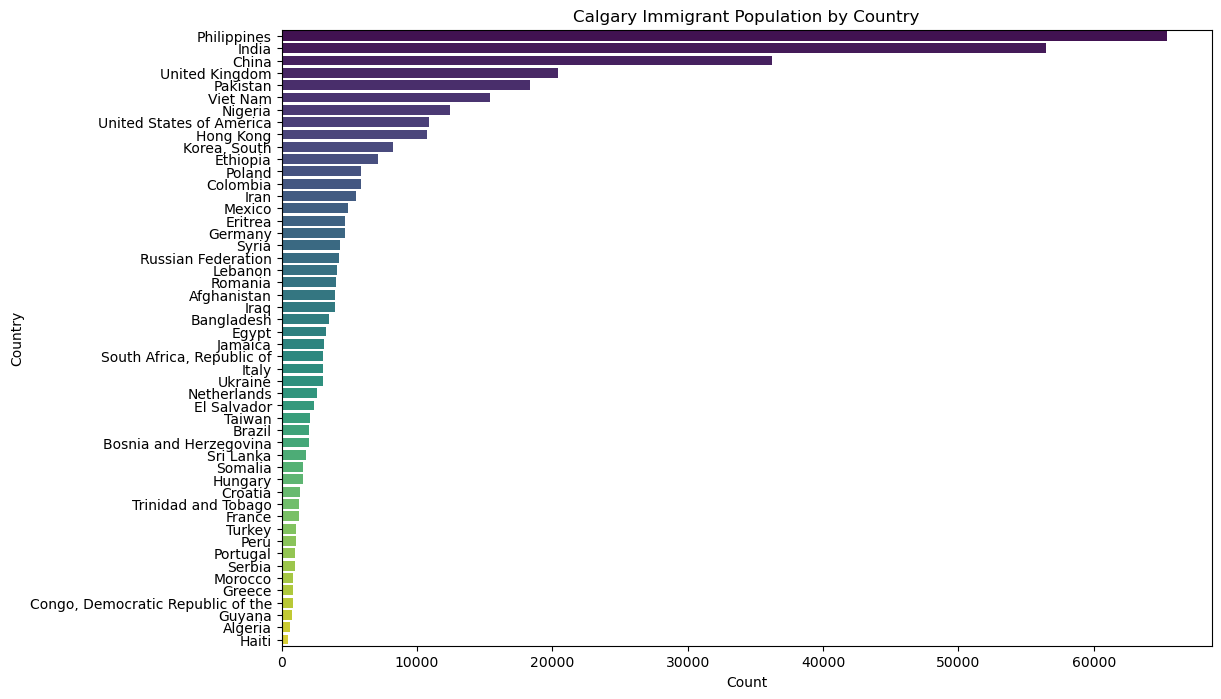

In [74]:
# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='DESCRIPTION', data=df_1.sort_values('Count', ascending=False), palette="viridis")
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Calgary Immigrant Population by Country')
plt.show()

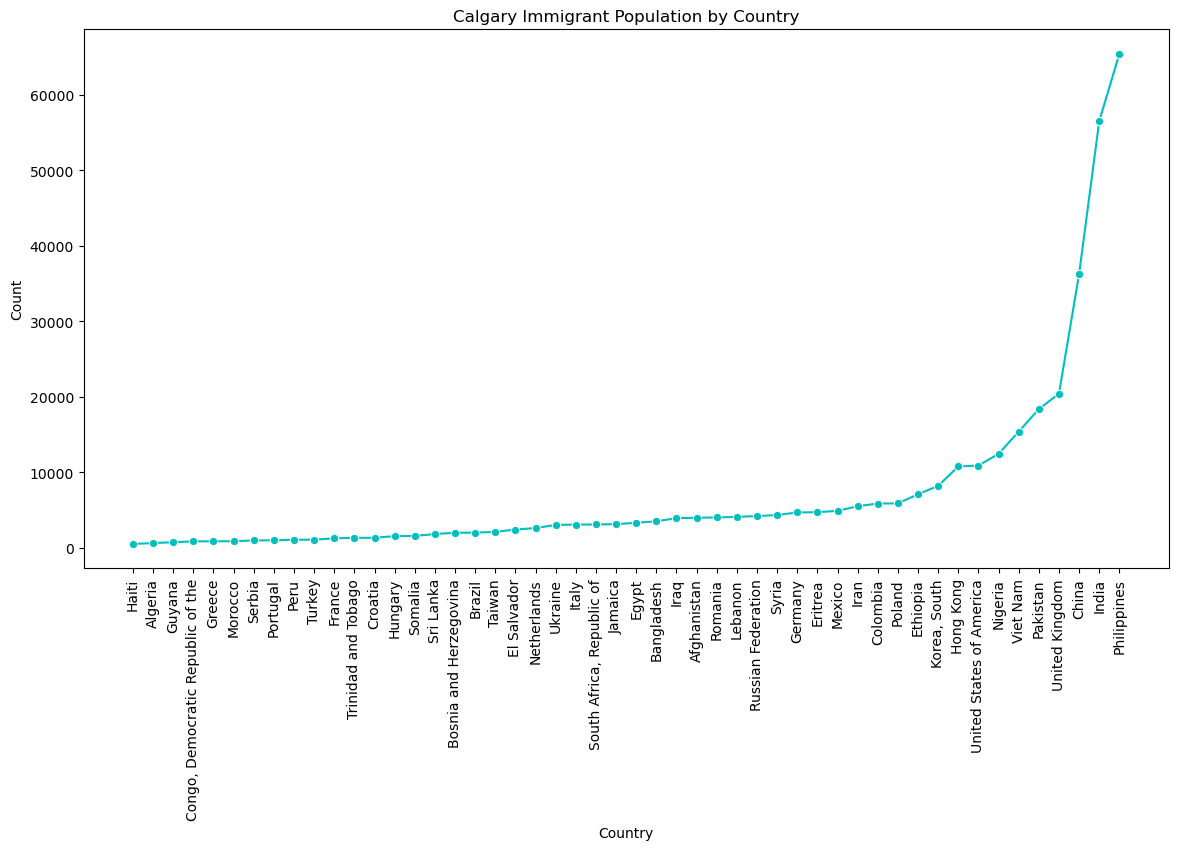

In [75]:
# Line plot for a change, though it's not typical for categorical data
plt.figure(figsize=(14, 7))
sns.lineplot(x='DESCRIPTION', y='Count', data=df_1.sort_values('Count'), marker='o', color='c')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Calgary Immigrant Population by Country')
plt.show()

In [65]:
df_2 = filter_df(df,'TOPIC', 'Age at immigration')
df_2['DESCRIPTION'] = df_2['DESCRIPTION'].str.lstrip().str.rstrip()
df_2 = df_2[~df_2['DESCRIPTION'].isin(['Total - Age at immigration for the immigrant population in private households - 25% sample data'])]
df_2 = df_2.drop(['TOPIC','Unnamed: 2','Unnamed: 4'], axis=1).reset_index(drop=True)

                   TOPIC                                        DESCRIPTION  \
1537  Age at immigration  Total - Age at immigration for the immigrant p...   
1538  Age at immigration                                      Under 5 years   
1539  Age at immigration                                      5 to 14 years   
1540  Age at immigration                                     15 to 24 years   
1541  Age at immigration                                     25 to 44 years   
1542  Age at immigration                                  45 years and over   

      Unnamed: 2     Count Unnamed: 4  
1537        84.0  430640.0        NaN  
1538         NaN   37050.0        NaN  
1539         NaN   71460.0        NaN  
1540         NaN   74550.0        NaN  
1541         NaN  204525.0        NaN  
1542         NaN   43060.0        NaN  


C:\Users\steph\AppData\Local\Temp\ipykernel_4704\2627288320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['DESCRIPTION'] = df_2['DESCRIPTION'].str.lstrip().str.rstrip()


In [66]:
df_2

,DESCRIPTION,Count
0,Under 5 years,37050.0
1,5 to 14 years,71460.0
2,15 to 24 years,74550.0
3,25 to 44 years,204525.0
4,45 years and over,43060.0


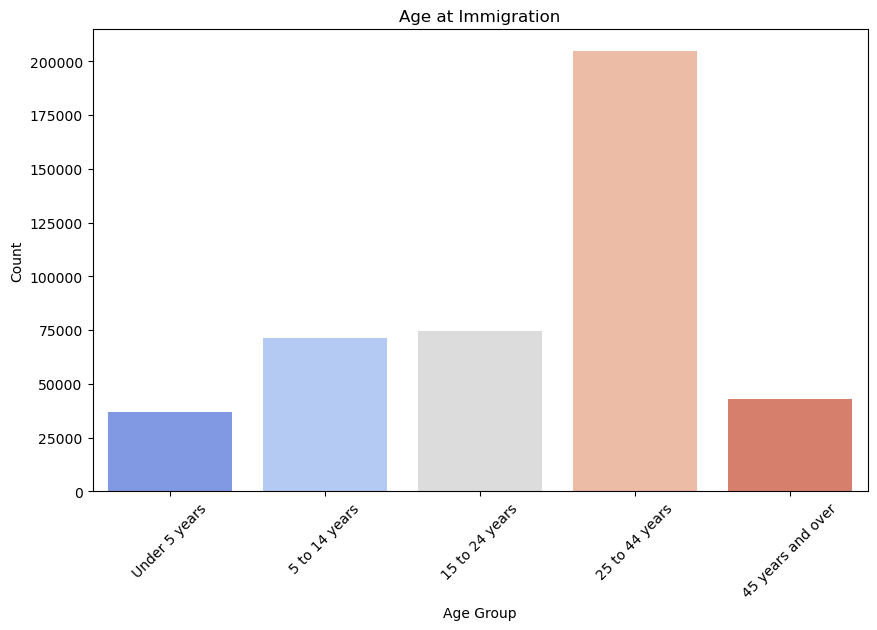

In [72]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DESCRIPTION', y='Count', data=df_2, palette="coolwarm")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age at Immigration')
plt.xticks(rotation=45)
plt.show()

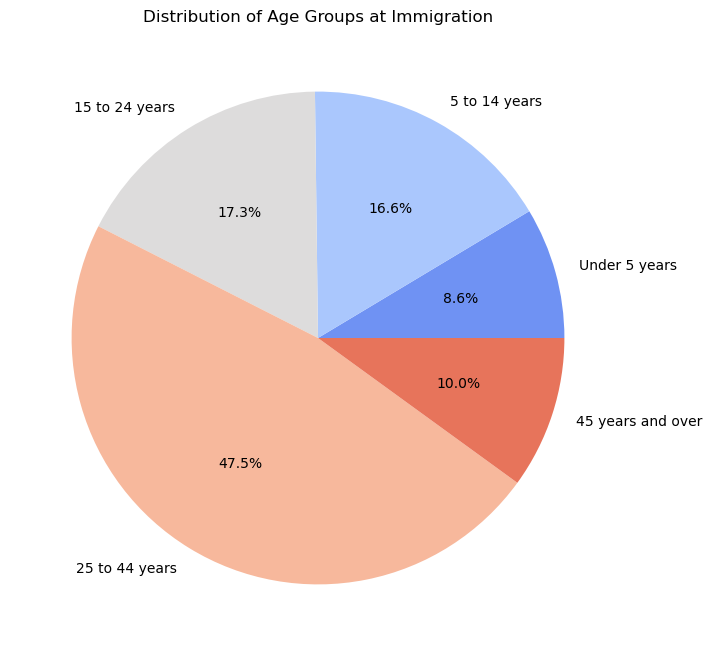

In [73]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_2['Count'], labels=df_2['DESCRIPTION'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(df_2)))
plt.title('Distribution of Age Groups at Immigration')
plt.show()